# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd
from timeit import default_timer as timer
from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("split_1k/")

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal and vertical (just to make it as independent from the position of the pipeline)
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size=BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 50
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg16 = VGG16()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4876 | train_acc: 0.7877 | validation_loss: 0.3607 | validation_acc: 0.8320
Epoch: 2 | train_loss: 0.3877 | train_acc: 0.8367 | validation_loss: 0.3434 | validation_acc: 0.8426
ResNet18 Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

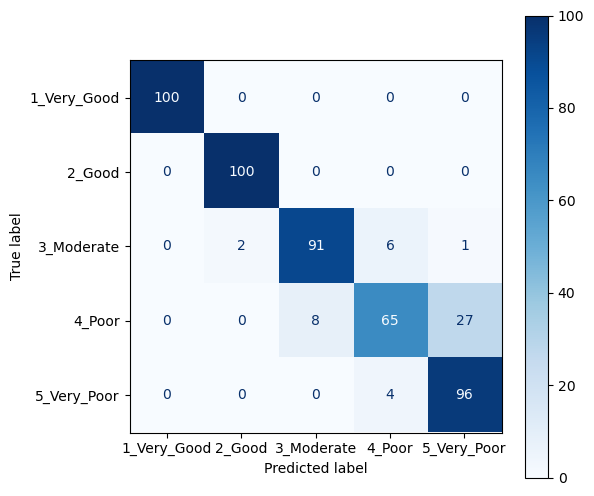

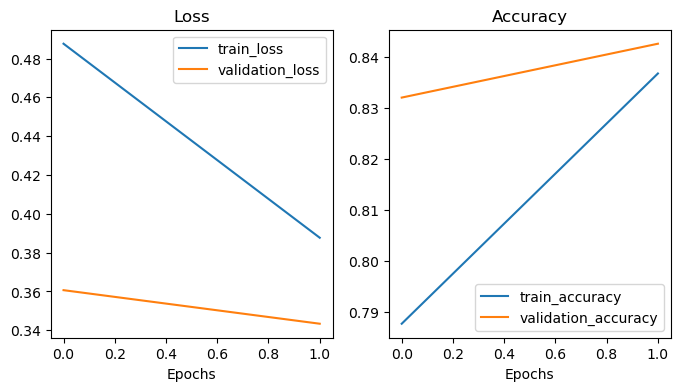

In [4]:
#Train ResNet18
resnet18.to(device)
rprop_optim = torch.optim.Rprop(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet18, test_dl, device, class_names)
print(f"ResNet18 Results")
plot_loss_curves(train_resnet18_results), plot_confusion_matrix

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6324 | train_acc: 0.7355 | validation_loss: 0.4342 | validation_acc: 0.8000
Epoch: 2 | train_loss: 0.4919 | train_acc: 0.7875 | validation_loss: 0.4187 | validation_acc: 0.8281
ResNet50 Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

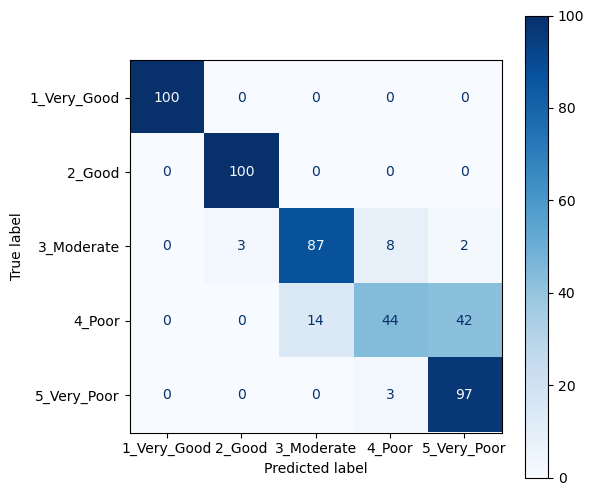

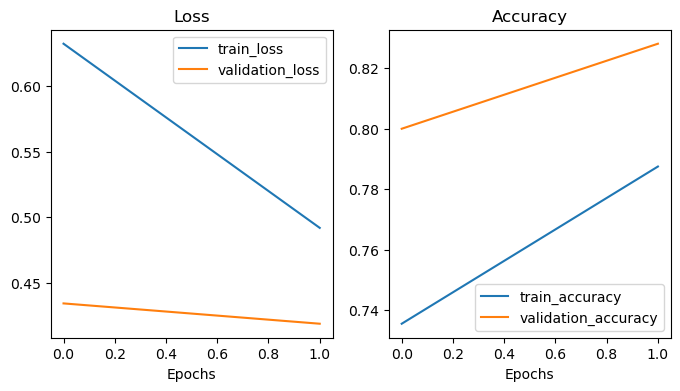

In [5]:
#Train ResNet50
resnet50.to(device)
rprop_optim = torch.optim.Rprop(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet50, test_dl, device, class_names)
print(f"ResNet50 Results")
plot_loss_curves(train_resnet50_results), plot_confusion_matrix

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 7.5915 | train_acc: 0.5078 | validation_loss: 0.7044 | validation_acc: 0.6816
Epoch: 2 | train_loss: 129.0861 | train_acc: 0.6090 | validation_loss: 0.7008 | validation_acc: 0.6738
VGG16 Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

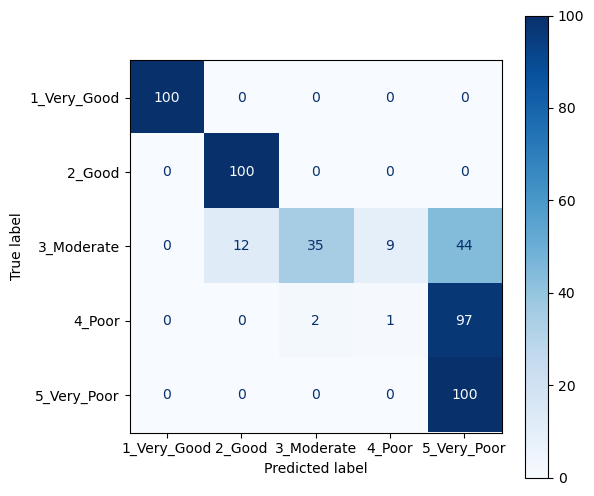

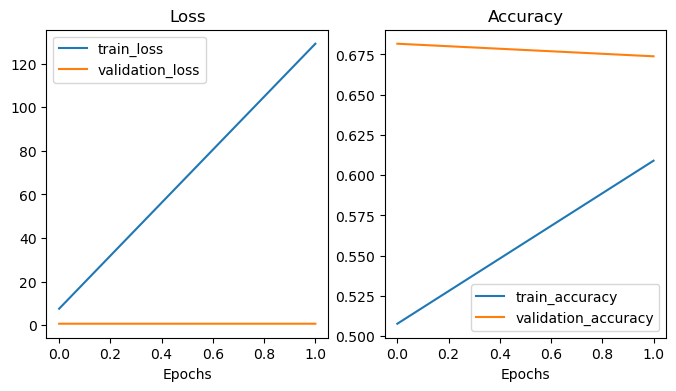

In [6]:
#Train VGG16
vgg16.to(device)
rprop_optim = torch.optim.Rprop(params=vgg16.parameters(), lr=lr)
train_vgg16_results, train_time_vgg16 = train(vgg16, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(vgg16, test_dl, device, class_names)
print(f"VGG16 Results")
plot_loss_curves(train_vgg16_results), plot_confusion_matrix

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7919 | train_acc: 0.6913 | validation_loss: 0.4662 | validation_acc: 0.7691
Epoch: 2 | train_loss: 1.2785 | train_acc: 0.7322 | validation_loss: 0.4733 | validation_acc: 0.7844
MobileNetV3 (Large) Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

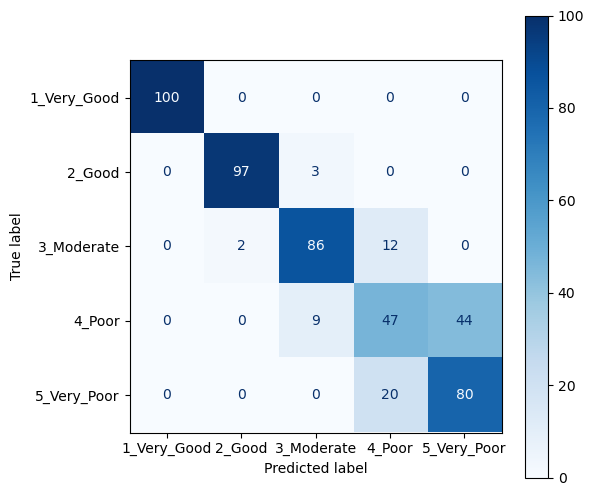

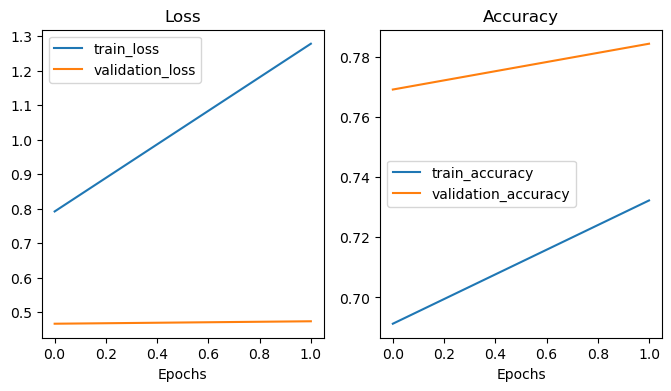

In [7]:
#Train MobileNet Large
mobnet_lrg.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lgr = train(mobnet_lrg, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names)
print(f"MobileNetV3 (Large) Results")
plot_loss_curves(train_mobnet_lrg_results), plot_confusion_matrix

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6541 | train_acc: 0.6707 | validation_loss: 0.5936 | validation_acc: 0.7660
Epoch: 2 | train_loss: 2.3323 | train_acc: 0.7310 | validation_loss: 0.4860 | validation_acc: 0.7691
MobileNetV3 (Small) Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

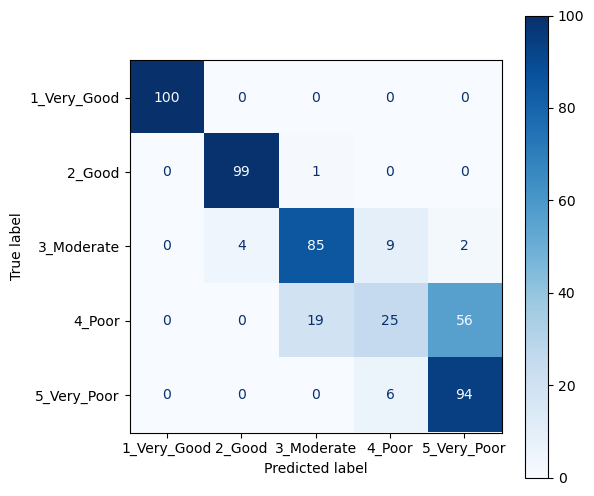

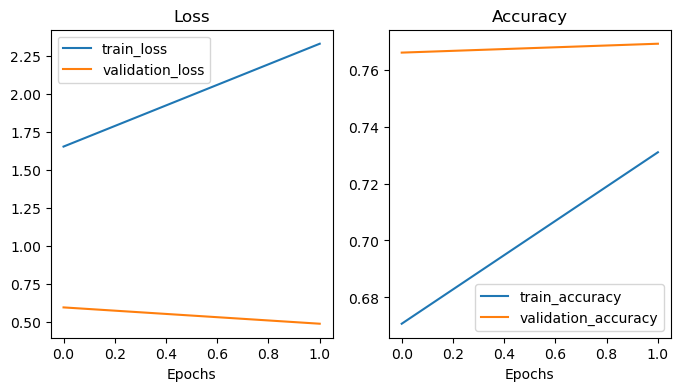

In [8]:
#Train MobileNet Small
mobnet_sml.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_sml, test_dl, device, class_names)
print(f"MobileNetV3 (Small) Results")
plot_loss_curves(train_mobnet_sml_results), plot_confusion_matrix

In [9]:
#Train EfficientNet ...

In [11]:
results_resnet18 = eval_model(model = resnet18, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_resnet50 = eval_model(model = resnet50, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_vgg16 = eval_model(model = vgg16, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_mobnet_lrg = eval_model(model = mobnet_lrg, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_mobnet_sml = eval_model(model = mobnet_sml, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

all_results = pd.DataFrame([
    results_resnet18,
    results_resnet50,
    results_vgg16,
    results_mobnet_sml,
    results_mobnet_lrg])

OSError: [WinError 1455] The paging file is too small for this operation to complete